In [17]:
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_context("talk")
import numpy as np
import importlib
from pyagn import sed
importlib.reload(sed)
from matplotlib import cm
from plot_utils.paper import set_size
import plot_utils
from plot_utils import paper 
importlib.reload(plot_utils.paper)
from qwind import plotting
importlib.reload(plotting)
import matplotlib as mpl
nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 10,
        "font.size": 10,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 8,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
}

mpl.rcParams.update(nice_fonts)

# SED plot

In [62]:
disc_colors = [
    '#ffc857',
    "#e9724C",
    '#c5283d',
    '#aa1155',
    '#880044'
]

In [3]:
bh = sed.SED(M = 1e8, mdot = 0.5)
distance = 1e26

In [4]:
warm_flux = bh.warm_flux(distance)
corona_flux = bh.corona_flux(distance)
total_flux = bh.total_flux(distance)

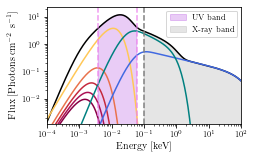

In [33]:
fig, ax = plt.subplots(1,1, figsize = paper.set_size(subplot=[1,1]))
distance = 1e26
r_range = [50, 250, 450, 650, 850]
dr = 20
colormap = cm.viridis(np.linspace(0,1,5))
disk_fluxes = []
energy_range = bh.ENERGY_RANGE_KEV
disk_line_list = []
xray_mask = energy_range > 0.1
total_line, = ax.loglog(energy_range, total_flux, color = 'black', label = 'Total' )
uv = ax.fill_between(x = energy_range[bh.UV_MASK], y1 = 0 , y2 = total_flux[bh.UV_MASK], color = 'darkviolet', alpha = 0.2, label = "UV band")
xray = ax.fill_between(x = energy_range[xray_mask], y1 = 0 , y2 = total_flux[xray_mask], color = 'grey', alpha = 0.2, label = "X-ray band")

for i, r in enumerate(r_range):
    disk_flux = np.pi * bh.disk_spectral_radiance_kev(energy_range, r)
    disk_lumin = disk_flux * 4 * np.pi * bh.Rg**2 * dr #* ((r+dr/2.)**2 - (r-dr/2.)**2)
    disk_flux = disk_lumin / (4 * np.pi * distance**2 )
    disk_line, = ax.loglog(energy_range, disk_flux, label = "%d"%r, color = disc_colors[i])
    disk_line_list.append(disk_line)
    #if i == 0:
    #    ax.fill_between(x = energy_range, y1 =0 , y2 = disk_flux, color = 'grey', alpha = 0.15)
    #ax.fill_between(x = energy_range[bh.UV_MASK], y1 =0 , y2 = disk_flux[bh.UV_MASK], color = 'white')
    #ax.fill_between(x = energy_range[bh.UV_MASK], y1 =0 , y2 = disk_flux[bh.UV_MASK], color = disc_colors[i], alpha = 0.3)
    disk_fluxes.append(disk_flux)
    
#first_legend = ax.legend(handles=disk_line_list, loc=1, title = "Disc Radius [Rg]")
#first_legend.get_title().set_fontsize('18') #legend 'Title' fontsize
#ax.add_artist(first_legend)
corona_line, = ax.loglog(energy_range, corona_flux, color = 'royalblue', label = 'Corona')
#ax.fill_between(x = energy_range[bh.UV_MASK], y1 = 0 , y2 = corona_flux[bh.UV_MASK], color = 'royalblue', alpha = 0.3)

warm_line, = ax.loglog(energy_range, warm_flux, color = 'teal', label = 'Warm region')
#ax.fill_between(x = energy_range[bh.UV_MASK], y1 = 0 , y2 = warm_flux[bh.UV_MASK], color = 'teal', alpha = 0.3)



ax.axvline(bh.ENERGY_UV_LOW_CUT_KEV, color = 'violet', linestyle = '--', alpha = 0.8)
split = ax.axvline(bh.ENERGY_UV_HIGH_CUT_KEV, color = 'violet', linestyle = '--', label = 'UV band', alpha = 0.8)

split2 = ax.axvline(0.1, color = 'grey', linestyle = '--', label = "X-ray band")
#= ax.axvline(100, color = 'grey', linestyle = '--', label = 'X-ray band')


ax.legend(handles = [uv, xray], loc="upper right")
ax.set_ylim(np.max(total_flux) / 10000, np.max(total_flux) * 2)
ax.set_xlim(1e-4,1e2)
ax.set_xlabel("Energy [keV]")
ax.set_ylabel("Flux [Photons cm$^{-2}$ s$^{-1}$] ")
plt.savefig("sed_uv_intersection.pdf", format='pdf', bbox_inches="tight")

# Radial UV fraction plot

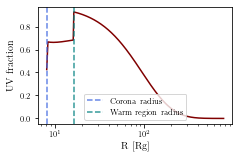

In [13]:
fig, ax = plt.subplots(figsize=paper.set_size())
fractions_uv, _, _, component_fractions = bh.compute_uv_fractions(1e26, include_corona = True, return_all = True)
fraction_r_range = np.linspace(bh.corona_radius, bh.gravity_radius, len(fractions_uv) )
ax.semilogx(fraction_r_range, fractions_uv, color = 'maroon')
ax.axvline(bh.corona_radius, color = 'royalblue', linestyle = "--", label = 'Corona radius', alpha = 0.8)
ax.axvline(bh.warm_radius, color = 'teal', linestyle = "--", label = 'Warm region radius', alpha = 0.8)
ax.set_ylabel("UV fraction")
ax.set_xlabel("R [Rg]")
ax.legend(loc = "lower center")
#plt.tight_layout()
plt.savefig("radial_uv_fractions.pdf", format='pdf', bbox_inches="tight")

In [14]:
bh.warm_radius

16.109935112753014

# Total UV fraction plot

In [2]:
M_range = np.geomspace(1e7,1e10, 11)
mdot_range = np.geomspace(0.05, 1, 10)

In [3]:
fractions = []
for M in M_range:
    for mdot in mdot_range:
        bh = sed.SED(M=M, mdot = mdot)
        fractions.append([bh.uv_fraction, bh.xray_fraction])
        

/home/arnau/Documents/pyagn/pyagn/sed.py:307: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  radial_integral = 2 * np.pi**2 * self.Rg**2 * integrate.quad( lambda r: r * self.disk_spectral_radiance(energy, r), self.warm_radius, self.gravity_radius)[0]


In [5]:
fractions = np.array(fractions)

fractions = fractions.reshape(11,10,2)

fraction_uv = fractions[...,0]
fraction_xray = fractions[...,1]

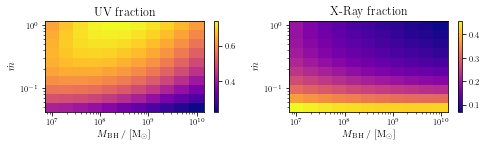

In [25]:
fig, ax = plt.subplots(1,2, figsize=paper.set_size('mnras_double', subplot=[1,2]))
#uv = ax[0].pcolormesh(np.log10(M_range), np.log10(mdot_range), fraction_uv)
uv = plotting.pcolormesh_sensible(M_range, mdot_range, fraction_uv, ax[0], cmap = "plasma") 
plt.colorbar(uv, ax = ax[0])
ax[0].set_title("UV fraction")

#xr = ax[1].pcolormesh(np.log10(M_range), np.log10(mdot_range), fraction_xray)
xr = plotting.pcolormesh_sensible(M_range, mdot_range, fraction_xray, ax[1], cmap = "plasma") 
plt.colorbar(xr, ax = ax[1])
ax[1].set_title("X-Ray fraction")

for axis in ax:
    axis.set_xlabel(r"$\;M_\mathrm{BH} \;/$ [M$_\odot$]")
    axis.set_ylabel(r"$ \dot m$")
#    labels = [item.get_text().replace("−", "-") for item in ax[0].get_yticklabels()]
    
    #labels = [10**float(label) for label in labels]
    #ax[0].set_xticklabels(labels)

plt.tight_layout()
#labels = [float(item.get_text().replace("−", "-")) for item in ax[0].get_yticklabels()]
#labels_new = ["%.2f"%(10**label) for label in labels]
#a = ax[0].set_yticklabels(labels_new)

#labels = [float(item.get_text().replace("−", "-")) for item in ax[1].get_yticklabels()]
#labels_new = ["%.2f"%(10**label) for label in labels]
#b = ax[1].set_yticklabels(labels_new)
#plt.savefig("../../UV_XR_fractions.png", dpi=200, bbox_to_inches="tight")
plt.savefig("uv_xray_fractions.pdf", format='pdf', bbox_inches="tight")